Importing

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [12]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training

In [13]:
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)

epochs = model_configs['epoch-count']
optimizer_lr = model_configs['optimizer-lr']

match model_configs['model-architecture']:
    case 'CNN':
        model = MRI_CNN(**model_configs['cnn-model-hyperparameters'])
    case _:
        model = MRI_CNN(**model_configs['cnn-model-hyperparameters'])
match model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam(model.parameters(), lr=optimizer_lr)
    case _:
        optimizer = optim.Adam(model.parameters(), lr=optimizer_lr)

model = model.to(device)

In [14]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:  10%|█         | 1/10 [00:13<02:05, 13.98s/epoch]

Epoch [1/10] Train Loss: 1.3122 Train Accuracy: 41.14% Validation Loss: 1.3203 Validation Accuracy: 40.06%


Training:  20%|██        | 2/10 [00:25<01:38, 12.34s/epoch]

Epoch [2/10] Train Loss: 1.0059 Train Accuracy: 57.78% Validation Loss: 0.9260 Validation Accuracy: 59.94%


Training:  30%|███       | 3/10 [00:36<01:22, 11.75s/epoch]

Epoch [3/10] Train Loss: 0.7357 Train Accuracy: 70.54% Validation Loss: 0.7144 Validation Accuracy: 72.37%


Training:  40%|████      | 4/10 [00:47<01:08, 11.48s/epoch]

Epoch [4/10] Train Loss: 0.4272 Train Accuracy: 83.47% Validation Loss: 0.8274 Validation Accuracy: 66.56%


Training:  50%|█████     | 5/10 [00:58<00:57, 11.43s/epoch]

Epoch [5/10] Train Loss: 0.2366 Train Accuracy: 90.95% Validation Loss: 0.8457 Validation Accuracy: 75.28%


Training:  60%|██████    | 6/10 [01:09<00:45, 11.40s/epoch]

Epoch [6/10] Train Loss: 0.1094 Train Accuracy: 96.77% Validation Loss: 0.9303 Validation Accuracy: 78.84%


Training:  70%|███████   | 7/10 [01:22<00:35, 11.69s/epoch]

Epoch [7/10] Train Loss: 0.0476 Train Accuracy: 98.33% Validation Loss: 0.9345 Validation Accuracy: 79.00%


Training:  80%|████████  | 8/10 [01:35<00:24, 12.08s/epoch]

Epoch [8/10] Train Loss: 0.0307 Train Accuracy: 98.98% Validation Loss: 1.0132 Validation Accuracy: 77.87%


Training:  90%|█████████ | 9/10 [01:48<00:12, 12.39s/epoch]

Epoch [9/10] Train Loss: 0.1081 Train Accuracy: 95.85% Validation Loss: 0.9735 Validation Accuracy: 79.48%


Training: 100%|██████████| 10/10 [02:00<00:00, 12.07s/epoch]

Epoch [10/10] Train Loss: 0.0395 Train Accuracy: 98.82% Validation Loss: 1.0788 Validation Accuracy: 75.77%


In [15]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:01<00:12,  1.40s/epoch]

Testing Epoch [1/10] Test Loss: 1.0939 Test Accuracy: 75.48% Time per Epoch: 1.40 seconds


Testing:  20%|██        | 2/10 [00:02<00:11,  1.39s/epoch]

Testing Epoch [2/10] Test Loss: 1.1257 Test Accuracy: 75.48% Time per Epoch: 1.38 seconds


Testing:  30%|███       | 3/10 [00:04<00:09,  1.38s/epoch]

Testing Epoch [3/10] Test Loss: 1.1482 Test Accuracy: 75.48% Time per Epoch: 1.36 seconds


Testing:  40%|████      | 4/10 [00:05<00:08,  1.37s/epoch]

Testing Epoch [4/10] Test Loss: 1.0931 Test Accuracy: 75.48% Time per Epoch: 1.37 seconds


Testing:  50%|█████     | 5/10 [00:06<00:06,  1.37s/epoch]

Testing Epoch [5/10] Test Loss: 1.0913 Test Accuracy: 75.48% Time per Epoch: 1.36 seconds


Testing:  60%|██████    | 6/10 [00:08<00:05,  1.36s/epoch]

Testing Epoch [6/10] Test Loss: 1.0946 Test Accuracy: 75.48% Time per Epoch: 1.33 seconds


Testing:  70%|███████   | 7/10 [00:09<00:04,  1.36s/epoch]

Testing Epoch [7/10] Test Loss: 1.1009 Test Accuracy: 75.48% Time per Epoch: 1.36 seconds


Testing:  80%|████████  | 8/10 [00:10<00:02,  1.36s/epoch]

Testing Epoch [8/10] Test Loss: 1.0937 Test Accuracy: 75.48% Time per Epoch: 1.37 seconds


Testing:  90%|█████████ | 9/10 [00:12<00:01,  1.35s/epoch]

Testing Epoch [9/10] Test Loss: 1.1160 Test Accuracy: 75.48% Time per Epoch: 1.33 seconds


Testing: 100%|██████████| 10/10 [00:13<00:00,  1.36s/epoch]

Testing Epoch [10/10] Test Loss: 1.1648 Test Accuracy: 75.48% Time per Epoch: 1.35 seconds
Average Test Loss: 1.1122
Average Test Accuracy: 75.48%


Model Classification:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       546
           1       0.98      0.99      0.98       560
           2       0.98      0.98      0.98       254
           3       1.00      1.00      1.00       497

    accuracy                           0.99      1857
   macro avg       0.99      0.99      0.99      1857
weighted avg       0.99      0.99      0.99      1857

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       169
           1       0.62      0.78      0.69       175
           2       0.69      0.84      0.75        97
           3       0.95      0.78      0.85       178

    accuracy                           0.76       619
   macro avg       0.77      0.77      0.76       619
weighted avg       0.78      0.76      0.76       619

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       186
           1       0.

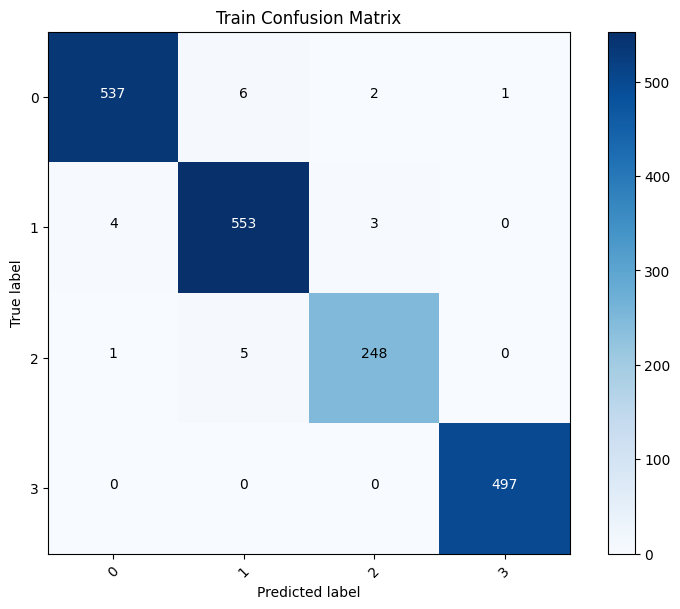

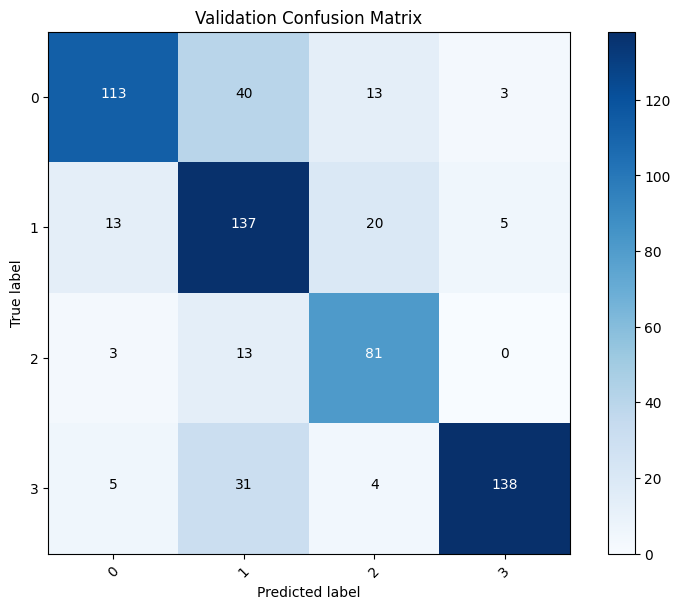

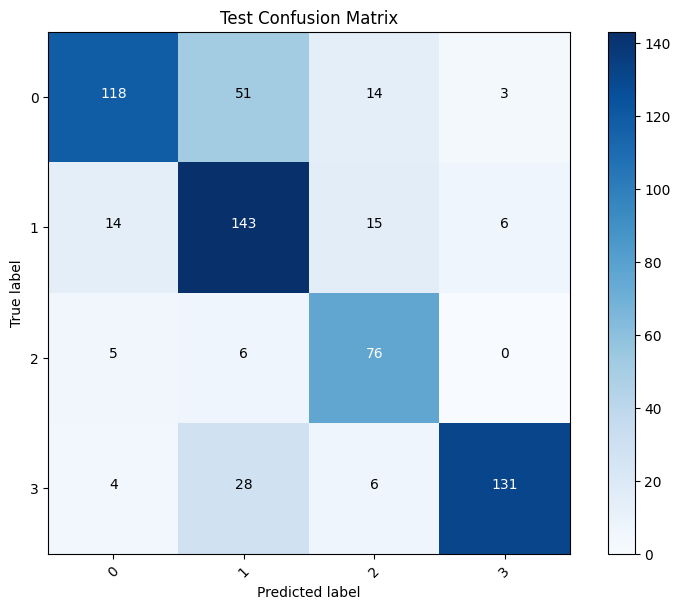

In [16]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()